# Chicago Socioeconomic and Crime Analysis
## SQL-Based Data Exploration Project

## Objective
Analyze Chicago public datasets to identify correlations between socioeconomic factors, school performance, and crime statistics using SQLite.
* Chicago Crime Data
* Chicago Public Schools
* Chicago Census Data


### Skills Demonstrated:
- **SQL Querying**: Complex database operations
- **Data Cleaning**: Handling missing values, type conversions
- **Data Analysis**: Statistical insights from multiple datasets
- **Data Visualization**: Matplotlib/Seaborn visualizations
- **Database Management**: SQLite database creation

In [19]:
!pip install pandas
!pip install ipython-sql prettytable 
!pip install matplotlib
!pip install seaborn

import prettytable

prettytable.DEFAULT = 'DEFAULT'


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import sqlite3 as sqlite3

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
%matplotlib inline
sns.set(style="whitegrid", palette="pastel")


In [4]:
%load_ext sql
%sql sqlite:///FinalDB.db

Use `Pandas` to load the data available in the links above to dataframes. Use these dataframes to load data on to the database `FinalDB.db` as required tables.


In [5]:
# Step 1: Load CSVs into DataFrames
census_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv")
schools_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv")
crime_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv")

# Step 2: Connect to SQLite DB
conn = sqlite3.connect('FinalDB.db')

# Step 3: Load DataFrames into the database as tables
census_df.to_sql("CENSUS_DATA", conn, if_exists="replace", index=False)
schools_df.to_sql("SCHOOLS", conn, if_exists="replace", index=False)
crime_df.to_sql("CRIME", conn, if_exists="replace", index=False)

print("Data successfully loaded into FinalDB.db!")

Data successfully loaded into FinalDB.db!


In [6]:
%sql sqlite:///FinalDB.db

In [7]:
%sql SELECT COUNT(*) AS total_crimes FROM CRIME;

 * sqlite:///FinalDB.db
Done.


total_crimes
533


In [8]:
%%sql
SELECT COMMUNITY_AREA_NUMBER, COMMUNITY_AREA_NAME, PER_CAPITA_INCOME 
FROM CENSUS_DATA
WHERE PER_CAPITA_INCOME < 11000;


 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PER_CAPITA_INCOME
26.0,West Garfield Park,10934
30.0,South Lawndale,10402
37.0,Fuller Park,10432
54.0,Riverdale,8201


In [9]:
%%sql
SELECT CASE_NUMBER
FROM CRIME
WHERE DESCRIPTION LIKE '%MINOR%';


 * sqlite:///FinalDB.db
Done.


CASE_NUMBER
HL266884
HK238408


In [10]:
%%sql
SELECT *
FROM CRIME
WHERE  PRIMARY_TYPE LIKE '%KIDNAPPING%' 

 * sqlite:///FinalDB.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
5276766,HN144152,2007-01-26,050XX W VAN BUREN ST,1792,KIDNAPPING,CHILD ABDUCTION/STRANGER,STREET,0,0,1533,15,29.0,25.0,20,1143050.0,1897546.0,2007,41.87490841,-87.75024931,"(41.874908413, -87.750249307)"


In [11]:
%%sql 
select * from crime 
where LOCATION_DESCRIPTION LIKE '%SCHOOL%'

 * sqlite:///FinalDB.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
4006321,HL353697,2005-05-04,077XX S BURNHAM AVE,460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, GROUNDS",0,0,421,4,7.0,43.0,08B,1196066.0,1854156.0,2005,41.75469107,-87.55703869,"(41.754691074, -87.557038686)"
4430638,HL725506,2005-11-09,048XX N FRANCISCO AVE,484,BATTERY,PRO EMP HANDS NO/MIN INJURY,"SCHOOL, PUBLIC, BUILDING",1,0,2031,20,40.0,4.0,08B,1156348.0,1932071.0,2005,41.96938944,-87.70048881,"(41.96938944, -87.700488807)"
6644618,HP716225,2008-12-04,030XX S DR MARTIN LUTHER KING JR DR,460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",0,0,2112,1,2.0,35.0,08B,1179306.0,1885032.0,2008,41.83981621,-87.61751617,"(41.839816207, -87.617516172)"
2341955,HH639427,2002-09-10,005XX N WALLER AVE,460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",0,0,1512,15,29.0,25.0,08B,1138238.0,1903181.0,2002,41.89045993,-87.76778089,"(41.890459933, -87.767780886)"
11110571,JA460432,2017-10-05,076XX S HOMAN AVE,460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, GROUNDS",0,0,835,8,18.0,70.0,08B,1155024.0,1853614.0,2017,41.75412154,-87.70746025,"(41.754121535, -87.707460248)"
7399281,HS200939,2010-03-10,053XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,"SCHOOL, PUBLIC, GROUNDS",0,0,1522,15,29.0,25.0,14,1140822.0,1897164.0,2010,41.8739014,-87.7584391,"(41.873901397, -87.758439102)"
3530721,HK577020,2004-08-23,016XX W JONQUIL TER,2024,NARCOTICS,POSS: HEROIN(WHITE),"SCHOOL, PUBLIC, GROUNDS",1,0,2422,24,49.0,1.0,18,1163893.0,1951001.0,2004,42.0211776,-87.67220843,"(42.021177601, -87.67220843)"
7502426,HS305355,2010-05-13,035XX S WASHTENAW AVE,1821,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,"SCHOOL, PUBLIC, BUILDING",1,0,913,9,12.0,58.0,18,1158944.0,1880896.0,2010,41.82890791,-87.69234919,"(41.828907913, -87.692349187)"
8082600,HT315369,2011-05-26,032XX W ADAMS ST,545,ASSAULT,PRO EMP HANDS NO/MIN INJURY,"SCHOOL, PUBLIC, GROUNDS",0,0,1124,11,28.0,27.0,08A,1154752.0,1898890.0,2011,41.87837031,-87.70724814,"(41.878370307, -87.707248137)"
7174283,HR585012,2009-10-13,043XX W 79TH ST,1330,CRIMINAL TRESPASS,TO LAND,"SCHOOL, PUBLIC, GROUNDS",1,0,834,8,13.0,70.0,26,1148764.0,1851854.0,2009,41.74941446,-87.7304466,"(41.749414464, -87.730446597)"


In [12]:
%%sql 
SELECT AVG(SAFETY_SCORE), Safety_Icon FROM SCHOOLS 
GROUP BY Safety_Icon;


 * sqlite:///FinalDB.db
Done.


AVG(SAFETY_SCORE),Safety_Icon
49.125,Average
None,NDA
67.21,Strong
92.68181818181819,Very Strong
14.136363636363637,Very Weak
31.316129032258065,Weak


In [13]:
%%sql
select COMMUNITY_AREA_NAME as community from CENSUS_DATA
order by PERCENT_HOUSEHOLDS_BELOW_POVERTY desc limit 5;

 * sqlite:///FinalDB.db
Done.


community
Riverdale
Fuller Park
Englewood
North Lawndale
East Garfield Park


In [14]:
%%sql
select * from 

 * sqlite:///FinalDB.db
(sqlite3.OperationalError) incomplete input
[SQL: select * from]
(Background on this error at: https://sqlalche.me/e/20/e3q8)



Double-click **here** for a hint

<!--
Query for the 'community area number' that has most number of incidents
-->


In [15]:
%%sql
SELECT COMMUNITY_AREA_NAME
FROM COMMUNITY_AREAS
WHERE HARDSHIP_INDEX = (
    SELECT MAX(HARDSHIP_INDEX) FROM COMMUNITY_AREAS
);

 * sqlite:///FinalDB.db
(sqlite3.OperationalError) no such table: COMMUNITY_AREAS
[SQL: SELECT COMMUNITY_AREA_NAME
FROM COMMUNITY_AREAS
WHERE HARDSHIP_INDEX = (
    SELECT MAX(HARDSHIP_INDEX) FROM COMMUNITY_AREAS
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


C:\Users\abiye\AppData\Local\Temp\ipykernel_9792\2650356989.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='PRIMARY_TYPE', data=crime_types, palette="Blues_d")


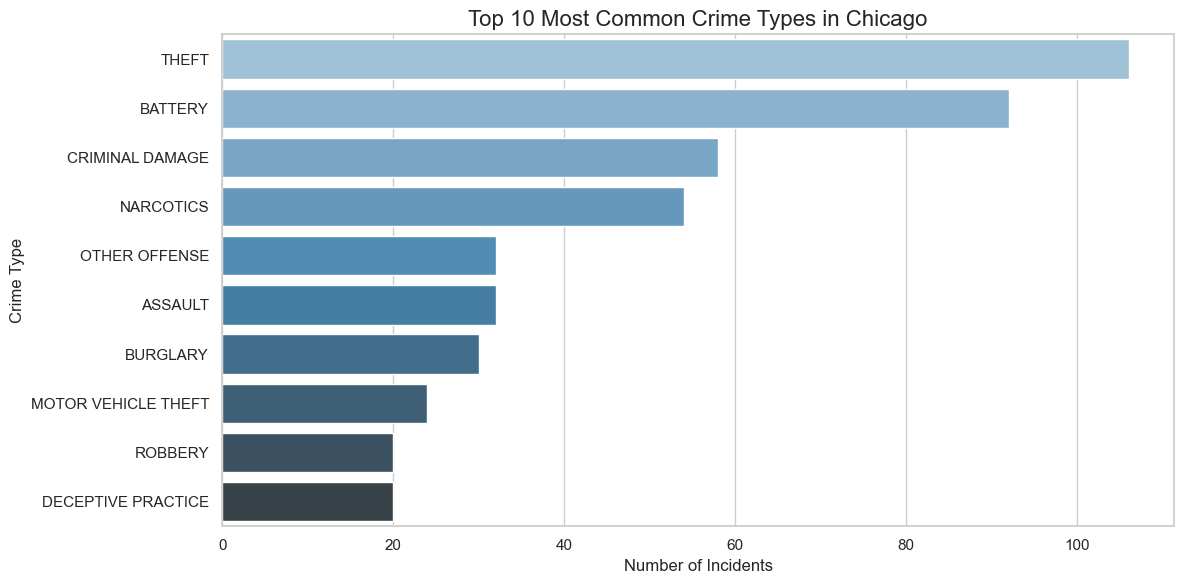

In [ ]:
crime_types = pd.read_sql("""
    SELECT PRIMARY_TYPE, COUNT(*) as count 
    FROM CRIME 
    GROUP BY PRIMARY_TYPE 
    ORDER BY count DESC
    LIMIT 10
""", conn)
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='PRIMARY_TYPE', data=crime_types, palette="Blues_d")
plt.title('Top 10 Most Common Crime Types in Chicago', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.tight_layout()
plt.savefig('crime_types.png', dpi=300)
plt.show()

C:\Users\abiye\AppData\Local\Temp\ipykernel_9792\2248568648.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='P', y='C',


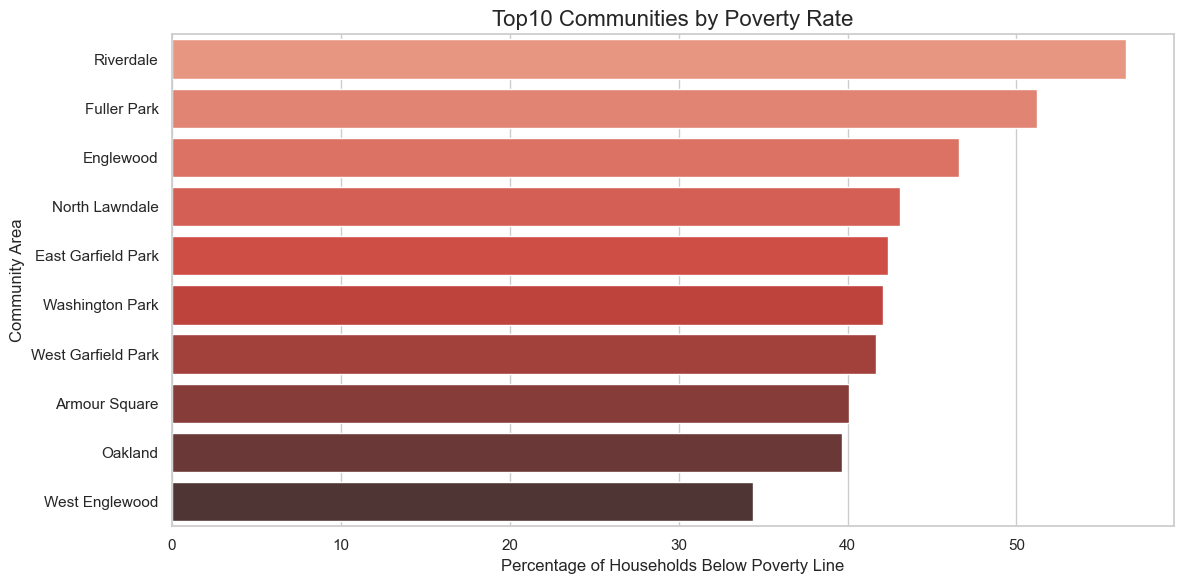

In [24]:
poverty_data = pd.read_sql("""
    SELECT COMMUNITY_AREA_NAME AS C, PERCENT_HOUSEHOLDS_BELOW_POVERTY AS P
    FROM CENSUS_DATA
    ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC
    LIMIT 10
""", conn)

plt.figure(figsize=(12, 6))
sns.barplot(x='P', y='C', 
            data=poverty_data, palette="Reds_d")
plt.title('Top10 Communities by Poverty Rate', fontsize=16)
plt.xlabel('Percentage of Households Below Poverty Line', fontsize=12)
plt.ylabel('Community Area', fontsize=12)
plt.tight_layout()
plt.savefig('poverty_distribution.png', dpi=300)
plt.show()

## Findings
- Communities with incomes < $11k: Riverdale ($8,201), Fuller Park ($10,432)
- Highest poverty areas: Riverdale, Fuller Park, Englewood
- Most common crime at schools: Battery

## Summary
This analysis reveals strong correlations between economic hardship indicators and crime frequency, with schools in low-income areas showing higher safety concerns.

## Data Sources
- City of Chicago Data Portal
- Chicago Public Schools
- Chicago Crime Database